In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The usual conjugate prior for Beta-Binomial models is the Beta(1,1) prior, which is a uniform (improper) prior distribution the Binomial parameter, theta.
prior_alpha = 0.5
prior_beta = 0.5

In [3]:
prior_dist = stats.beta(prior_alpha, prior_beta)

In [4]:
xs = np.linspace(0, 1, 1000)
ys = prior_dist.pdf(xs)

Text(0, 0.5, 'Probability')

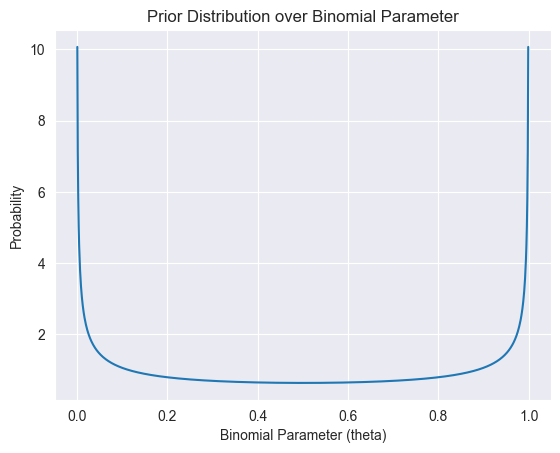

In [5]:
plt.plot(xs, ys)
plt.title("Prior Distribution over Binomial Parameter")
plt.xlabel("Binomial Parameter (theta)")
plt.ylabel("Probability")

In [6]:
%matplotlib notebook
from ipywidgets import *

def f(xs, successes, failures):
    return stats.beta.pdf(xs, successes, failures)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
a_line, = ax.plot(xs, f(xs, successes=0, failures=0), label="A = Aktus Platform", color="blue")
b_line, = ax.plot(xs, f(xs, successes=0, failures=0), label="B = Azure", color="orange")
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
fig.legend()

a_posterior = None
b_posterior = None
a_posterior_alpha, a_posterior_beta = prior_alpha, prior_beta
b_posterior_alpha, b_posterior_beta = prior_alpha, prior_beta

def update(a_successes=0, a_failures=0, b_successes=0, b_failures=0):
    global a_posterior, b_posterior
    global a_posterior_alpha, a_posterior_beta
    global b_posterior_alpha, b_posterior_beta
    a_posterior_alpha, a_posterior_beta = a_successes + prior_alpha, a_failures + prior_beta
    b_posterior_alpha, b_posterior_beta = b_successes + prior_alpha, b_failures + prior_beta
    a_posterior = f(xs, successes=a_posterior_alpha, failures=a_posterior_beta)
    b_posterior = f(xs, successes=b_posterior_alpha, failures=b_posterior_beta)
    a_line.set_ydata(a_posterior)
    b_line.set_ydata(b_posterior)
    
    fig.canvas.draw_idle()

interact(update, 
         a_successes=widgets.IntSlider(min=0, max=100, step=1, value=0),
         a_failures=widgets.IntSlider(min=0, max=100, step=1, value=0),
         b_successes=widgets.IntSlider(min=0, max=100, step=1, value=0),
         b_failures=widgets.IntSlider(min=0, max=100, step=1, value=0),
         );

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=0, description='a_successes'), IntSlider(value=0, description='a_failure…

In [21]:
n_samples = 100000
a_samples = stats.beta(a_posterior_alpha, a_posterior_beta).rvs(n_samples)
b_samples = stats.beta(b_posterior_alpha, b_posterior_beta).rvs(n_samples)

print("Posterior credence that A >= B: ", (a_samples >= b_samples).mean())

Posterior credence that A >= B:  0.16355


In [22]:
print("Estimated effect size: ", (a_samples-b_samples).mean())

Estimated effect size:  -0.11453592835972577
